In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir('data')

['Env_QH.csv',
 'micro_sud3.pkl',
 'AllPM_QH.csv',
 'micro_sud3_normalized.pkl',
 'AllNO2_QH.csv']

In [3]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]
def dataframe_to_xy(df):
    return (np.array(df[['PM_6182', 'PM_6179', 'PM_617B', 'PM25_6182', 'PM25_6179',\
                         'PM25_617B', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['PM_ref']))
def dataframe_to_xy(df, look_back):
    i = look_back
    while True:
        sequence = df.iloc[i - look_back:i]
        yield np.array(sequence[['PM_6182', 'PM_6179', 'PM_617B', 'PM25_6182', 'PM25_6179',\
                         'PM25_617B', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]).reshape(look_back, 1, 11) , np.array(sequence['PM_ref'])
        i += 1
        if i == len(df):
            i = look_back
            
def dataframe_to_xy_test(df, look_back):
    X_test, y_test = [], []
    i = look_back
    while i < len(df):
        sequence = df.iloc[i - look_back:i]
        X_test.append(np.array(sequence[['PM_6182', 'PM_6179', 'PM_617B', 'PM25_6182', 'PM25_6179',\
                         'PM25_617B', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]).reshape(look_back, 1, 11))
        y_test.append(np.array(sequence['PM_ref']))
        i += 1
        if i == len(df):
            break
            
    return np.array(X_test), np.array(y_test)
            
        
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train = dataframe_to_xy(df_train, 24)
X_valid = dataframe_to_xy(df_valid, 24)
X_test, y_test = dataframe_to_xy_test(df_test, 24)

In [4]:
a = next(X_train)

In [5]:
from keras.layers import SimpleRNN, Dense, LSTM, GRU
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def lstm_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def gru_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=(input_dim)))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [6]:
model = simple_rnn_model(16, (1, 11))
history = model.fit_generator(X_train, epochs=100, steps_per_epoch=16, validation_data=X_valid, validation_steps=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 2s - loss: 240.7580 - val_loss: 87.9542
Epoch 2/100
16/16 [==============================] - 0s - loss: 324.0374 - val_loss: 68.8147
Epoch 3/100
16/16 [==============================] - 0s - loss: 722.3208 - val_loss: 115.7490
Epoch 4/100
16/16 [==============================] - 0s - loss: 887.9067 - val_loss: 148.4357
Epoch 5/100
16/16 [==============================] - 0s - loss: 556.8271 - val_loss: 241.9434
Epoch 6/100
16/16 [==============================] - 0s - loss: 572.5114

16/16 [==============================] - 0s - loss: 15.0308 - val_loss: 136.2351
Epoch 82/100
16/16 [==============================] - 0s - loss: 5.1211 - val_loss: 24.9182
Epoch 83/100
16/16 [==============================] - 0s - loss: 2.9345 - val_loss: 298.5112
Epoch 84/100
16/16 [==============================] - 0s - loss: 13.5083 - val_loss: 584.0840
Epoch 85/100
16/16 [==============================] - 0s - loss: 17.7164 - val_loss: 834.3745
Epoch 86/100
16/16 [==============================] - 0s - loss: 3.4599 - val_loss: 585.6539
Epoch 87/100
16/16 [==============================] - 0s - loss: 2.3528 - val_loss: 411.6891
Epoch 88/100
16/16 [==============================] - 0s - loss: 61.1653 - val_loss: 476.1581
Epoch 89/100
16/16 [==============================] - 0s - loss: 316.3557 - val_loss: 519.9321
Epoch 90/100
16/16 [==============================] - 0s - loss: 380.3658 - val_loss: 391.0831
Epoch 91/100
16/16 [==============================] - 0s - loss: 145.4739 - 

In [7]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()

def dataframe_to_xy_no_generator(df, look_back):
    X, y = [], []
    i = look_back
    while i < len(df):
        sequence = df.iloc[i - look_back:i]
        X.append(np.array(sequence[['PM_6182', 'PM_6179', 'PM_617B', 'PM25_6182', 'PM25_6179',\
                         'PM25_617B', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]).reshape(look_back, 1, 11))
        y.append(np.array(df.iloc[i]['PM_ref']))
        i += 1
        if i == len(df):
            break
    X = np.array(X)
    y = np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[3]))
    return X, y

In [8]:
X_train, y_train = dataframe_to_xy_no_generator(df_train, 24)
X_valid, y_valid = dataframe_to_xy_no_generator(df_valid, 24)
X_test, y_test = dataframe_to_xy_no_generator(df_test, 24)

In [9]:
from keras.layers import SimpleRNN, Dense, LSTM, GRU
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def lstm_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

def gru_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=(input_dim)))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

In [10]:
model = simple_rnn_model(16, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 16)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=16, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Train on 1102 samples, validate on 539 samples
Epoch 1/5000
1102/1102 [==============================] - 5s - loss: 527.0749 - val_loss: 807.4887
Epoch 2/5000
1102/1102 [==============================] - 2s - loss: 469.7450 - val_loss: 706.0692
Epoch 3/5000
1102/1102 [==============================] - 2s - loss: 408.0203 - val_loss: 649.5457
Epoch 4/5000
1102/1102 [==============================] - 2s - loss: 360.8012 - val_loss: 603.0961
Epoch 5/5000
1102/1102 [==============================] - 2s - loss: 323.8026 - val_loss: 563.2627
Epoch 6/5000
1102/1102 [==============================] - 2s - loss: 292.5147 - val_loss: 528.8296
Epoch 7/5000
1102/1102 [==============================] - 2s - loss: 267.6393 - val_loss: 501.9558
Epoch 8/5000
1102/1102 [==============================] - 2s - loss: 247.1418 - val_loss: 476.7355
Epoch 9/5000
1102/1102 [==============================] - 2s - loss: 227.1555 - val_loss: 455.9925
Epoch 10/5000
1102/1102 [==============================] - 2s 

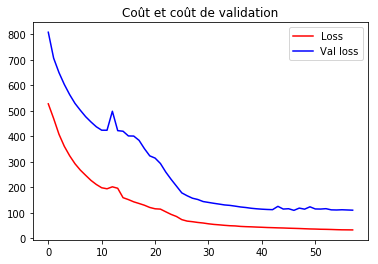

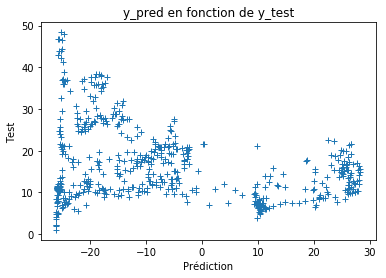

In [12]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [15]:
model = lstm_model(16, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 16)                1792      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,809
Trainable params: 1,809
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=16, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Train on 1102 samples, validate on 539 samples
Epoch 1/5000
1102/1102 [==============================] - 7s - loss: 525.9527 - val_loss: 794.4789
Epoch 2/5000
1102/1102 [==============================] - 6s - loss: 455.9805 - val_loss: 666.3283
Epoch 3/5000
1102/1102 [==============================] - 6s - loss: 379.9015 - val_loss: 594.2004
Epoch 4/5000
1102/1102 [==============================] - 6s - loss: 333.5245 - val_loss: 541.6576
Epoch 5/5000
1102/1102 [==============================] - 6s - loss: 297.0443 - val_loss: 496.5548
Epoch 6/5000
1102/1102 [==============================] - 6s - loss: 266.1631 - val_loss: 457.7730
Epoch 7/5000
1102/1102 [==============================] - 7s - loss: 239.6944 - val_loss: 423.2032
Epoch 8/5000
1102/1102 [==============================] - 7s - loss: 216.7445 - val_loss: 392.7829
Epoch 9/5000
1102/1102 [==============================] - 6s - loss: 196.8508 - val_loss: 366.0180
Epoch 10/5000
1102/1102 [==============================] - 6s 

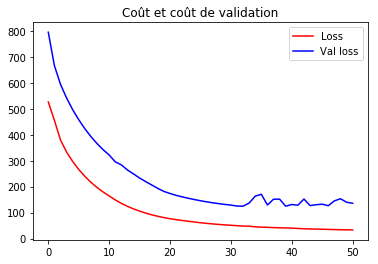

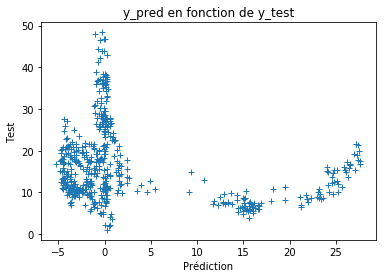

In [17]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [18]:
model = gru_model(16, X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 16)                1344      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=16, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Train on 1102 samples, validate on 539 samples
Epoch 1/5000
1102/1102 [==============================] - 6s - loss: 530.6202 - val_loss: 799.1553
Epoch 2/5000
1102/1102 [==============================] - 5s - loss: 468.9815 - val_loss: 674.3885
Epoch 3/5000
1102/1102 [==============================] - 5s - loss: 388.8781 - val_loss: 599.2855
Epoch 4/5000
1102/1102 [==============================] - 5s - loss: 340.7207 - val_loss: 543.0146
Epoch 5/5000
1102/1102 [==============================] - 5s - loss: 302.8017 - val_loss: 495.5599
Epoch 6/5000
1102/1102 [==============================] - 5s - loss: 270.9833 - val_loss: 454.5212
Epoch 7/5000
1102/1102 [==============================] - 4s - loss: 243.7336 - val_loss: 418.4116
Epoch 8/5000
1102/1102 [==============================] - 5s - loss: 220.1970 - val_loss: 386.5818
Epoch 9/5000
1102/1102 [==============================] - 5s - loss: 199.9488 - val_loss: 358.0916
Epoch 10/5000
1102/1102 [==============================] - 5s 

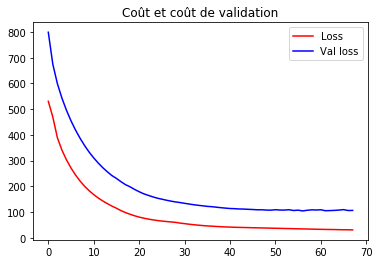

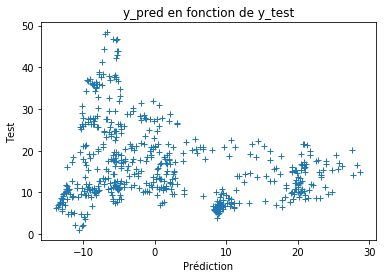

In [20]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()